In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Data Import

In [4]:
usecols = [
    'room_type', 'neighbourhood_group',
    'latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

data = pd.read_csv('/Users/luis/Desktop/Py/mlbookcamp-code/course-zoomcamp/03-classification/AB_NYC_2019.csv', usecols=usecols)

In [5]:
print(data.shape)

(48895, 10)


In [6]:
data.head(10)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [7]:
data['reviews_per_month']=data.reviews_per_month.fillna(0)

### Frequent Values

In [8]:
data.describe(include=["O"])

,neighbourhood_group,room_type
count,48895,48895
unique,5,3
top,Manhattan,Entire home/apt
freq,21661,25409


In [9]:
data['neighbourhood_group'].mode()

0    Manhattan
dtype: object

#### Answer for Question №1: 'Manhattan'

In [10]:
data_numeric = data.copy()
data_numeric = data.drop(["neighbourhood_group","room_type", "price"], axis=1)
data_numeric.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


### Correlation Calculation

In [11]:
data_numeric.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.062747,0.059094,0.138516,-0.114713,0.082731
minimum_nights,0.024869,-0.062747,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.144303,0.172028,0.163732,0.225701,1.000000


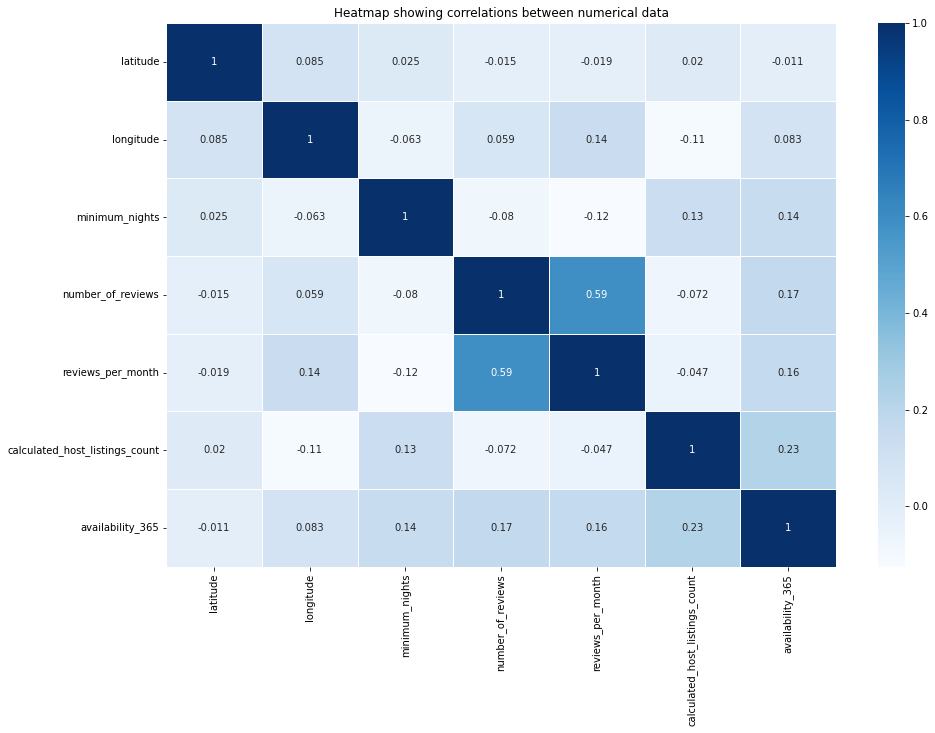

In [12]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [13]:
data_numeric.corr().unstack().sort_values(ascending = False)

latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
reviews_per_month               reviews_per_month                 1.000000
minimum_nights                  minimum_nights                    1.000000
number_of_reviews               number_of_reviews                 1.000000
availability_365                availability_365                  1.000000
number_of_reviews               reviews_per_month                 0.589407
reviews_per_month               number_of_reviews                 0.589407
availability_365                calculated_host_listings_count    0.225701
calculated_host_listings_count  availability_365                  0.225701
availability_365                number_of_reviews                 0.172028
number_of_reviews               availability_365                  0.172028
availability_365         

#### Answer for Question №2: 'number_of_reviews' and 'reviews_per_month'

In [14]:
data_class = data.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

In [15]:
data_class = data_class.drop('price', axis=1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)

In [18]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

### Mutual information

In [21]:
from sklearn.metrics import mutual_info_score

In [22]:
cat = ['neighbourhood_group', 'room_type']

In [23]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [24]:
df_mi

,MI
room_type,0.143035
neighbourhood_group,0.046513


#### Answer for Question №3: 'room_type'

In [25]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

### Classification and accuracy of a model

In [26]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
num = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [28]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [29]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.79


#### Answer for Question №4: 0.79

In [30]:
features = cat + num
features

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### Feature elimination 

In [31]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

neighbourhood_group 0.03992330504141528 0.7500766949585848
room_type 0.0756120257695061 0.7143879742304939
latitude 0.003927804478985664 0.7860721955210144
longitude 0.0040300644237653005 0.7859699355762347
minimum_nights 0.005257183761120832 0.7847428162388792
number_of_reviews 0.003825544534206027 0.786174455465794
reviews_per_month 0.006586563043256 0.783413436956744
calculated_host_listings_count 0.00372328458942639 0.7862767154105736
availability_365 0.009143061662746699 0.7808569383372533


#### Answer for Question №5: smallest difference - 'number_of_reviews'

In [32]:
data['price']=np.log1p(data['price'])

In [33]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [34]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [35]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [37]:
del df_train['price']
del df_val['price']
del df_test['price']

### Ridge Regression

In [38]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [39]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [41]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.497
0.01 0.497
0.1 0.497
1 0.497
10 0.498


#### Answer for Question №6: 0